In [1]:
%pylab inline
%matplotlib inline
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['/Users/Argen/Documents/MAS/R&D/Code/pgm'])

Populating the interactive namespace from numpy and matplotlib
Python 2.7.10 |Anaconda 2.3.0 (x86_64)| (default, May 28 2015, 17:04:42) 
[GCC 4.2.1 (Apple Inc. build 5577)] on darwin


In [2]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

In [3]:
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

In [4]:
import networkx as nx

In [5]:
from pgm.utils.tools import draw_graph, node_types
from pgm.nodes.chance import Chance
from pgm.nodes.decision import Decision
from pgm.nodes.utility import Utility

In [6]:
def sp(x):
    #return len(x[1]['domain'])
    return len(T.node[x]['domain'])

def sz(V):
    s = 1
    for v in V:
        s = s * sp(v)
    return s

def fa(g, x, data=False):
    f = [x]
    if data:
        for n in g.neighbors(x[0]):
            f.append((n, g.node[n]))
        return f
    else:
        f.extend(g.neighbors(x))
        return f

def nb(g, x, data=False):
    neigh = []
    if data:
        for n in g.neighbors(x[0]):
            neigh.append((n, g.node[n]))
        return neigh
    else:
        return g.neighbors(x)

def is_simplicial(g, x):
    f = fa(g, x)
    n = nb(g, x)
    s = g.subgraph(f)
    # draw_graph(s, pos_ex)
    
    if len(n)>1:
        t = []
        for e1, e2 in list(combinations(n, 2)):
            if g.has_edge(e1, e2) or g.has_edge(e2, e1):
                t.append(True)
            else:
                t.append(False)
        if sum(t) == len(t):
            return True
        else:
            return False
    else:
        return True

In [7]:
def triangulate(ugraph):
    t = ugraph.copy()
    fill_ins = []
    cliques = []
    
    for n, w in sorted(windows.items(), reverse=True):
        size = {}
        for i in w:
            size[i] = sz(fa(t, i))
    
        while size != {}:
            # Remove simplicial nodes
            simplicial = [n for n in size if is_simplicial(t, n)]
    
            if len(simplicial) > 0:
                # print len(size), simplicial, t.nodes()
    
                for n in simplicial:
                    f = fa(t,n)
                    subset = filter(lambda x: set(f)< set(x), cliques)
                    if subset == []:
                        cliques.append(f)
                    t.remove_node(n)
                    size.pop(n)
                # print t.nodes()
            else:
                # print len(size),t.nodes()
                for i in size:
                    size[i] = sz(fa(t, i))
    
                if len(size) > 0:
                    candidate = min(size, key=size.get)
                    # s = t.subgraph(fa(t, candidate))
                    neigh = nb(t, candidate)
    
                    # print list(combinations(n, 2))
                    fill = []
                    # TODO: Algo esta mal con los cliques
                    for e1, e2 in list(combinations(neigh, 2)):
                        if not t.has_edge(e1, e2) or not t.has_edge(e2, e1):
                            # print candidate, e1, e2
                            t.add_edge(e1, e2)
                            fill_ins.append((e1, e2))
                            
                    f = fa(t,candidate)
                    subset = filter(lambda x: set(f)< set(x), cliques)
                    if subset == []:
                        cliques.append(f)
                    t.remove_node(candidate)
                    size.pop(candidate)
                    # print candidate, t.nodes()
            # draw_graph(t, pos_ex)
            return fill_ins, cliques

other


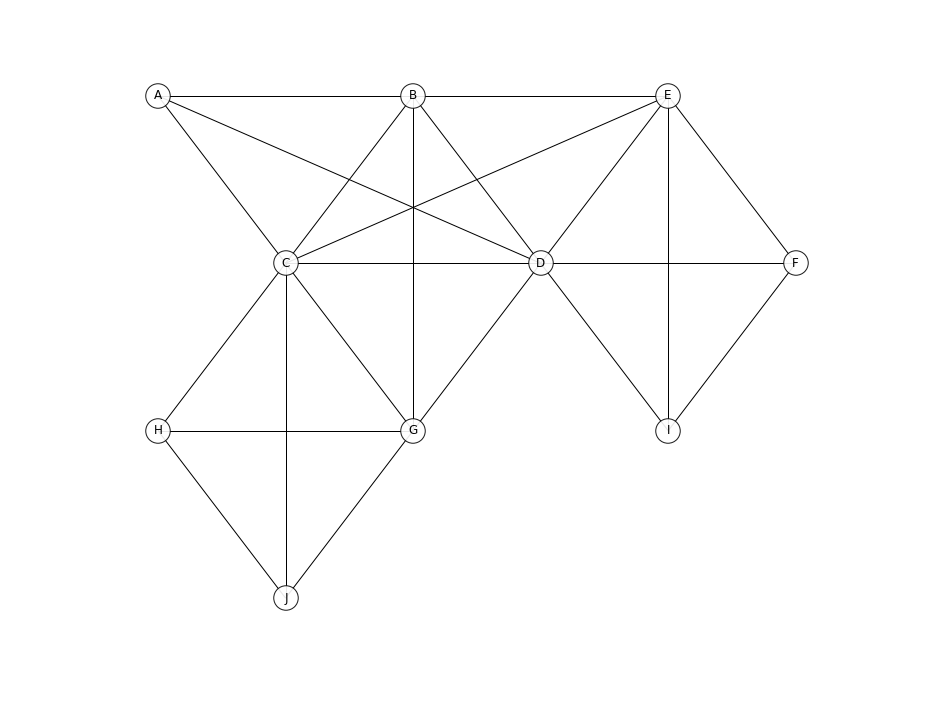

In [8]:
T = nx.Graph(title='triangulation_example')
T.add_nodes_from([('A', {'type': 'chance', 'domain': [1, 2]}), 
                  ('B', {'type': 'chance', 'domain': [1, 2]}),
                  ('C', {'type': 'chance', 'domain': [1, 2]}), 
                  ('D', {'type': 'chance', 'domain': [1, 2]}),
                  ('E', {'type': 'chance', 'domain': [1, 2]}),
                  ('F', {'type': 'chance', 'domain': [1, 2]}), 
                  ('G', {'type': 'chance', 'domain': [1, 2]}),
                  ('H', {'type': 'chance', 'domain': [1, 2]}), 
                  ('I', {'type': 'chance', 'domain': [1, 2]}),
                  ('J', {'type': 'chance', 'domain': [1, 2]})])
T.add_edges_from([('A', 'B'), ('B','E'),('A','C'),('B','C'),('B','D'),('E','D'),('E','F'),
                  ('A','D'),('E','C'),('B','G'),('E','I'),('C','D'),('D','F'),('C','H'),('C','G'),
                  ('D','G'),('D','I'),('F','I'),('H','J'),('G','J'),('C','J'),('H','G')])

pos_ex = {'A':(0,300),'B':(200,300),'C':(100,200),'D':(300,200),'E':(400,300),
          'F':(500,200),'G':(200,100),'H':(0,100),'I':(400,100),'J':(100,0)}

draw_graph(T, pos_ex)

In [9]:
order = {'A':5,'B':0,'C':4,'D':0,'E':0,'F':0,'G':0,'H':3,'I':2,'J':1}
windows = {0:['A','B','C','D','E','F','G','H','I','J']}

nx.is_chordal(T)

True

In [10]:
fill_ins, cliques = triangulate(T)
print fill_ins
print cliques

[]
[['A', 'C', 'B', 'D'], ['F', 'I', 'E', 'D'], ['H', 'C', 'J', 'G']]


In [11]:
nx.chordal_graph_cliques(T)

{frozenset({'A', 'B', 'C', 'D'}),
 frozenset({'C', 'G', 'H', 'J'}),
 frozenset({'B', 'C', 'D', 'E'}),
 frozenset({'D', 'E', 'F', 'I'}),
 frozenset({'B', 'C', 'D', 'G'})}

In [12]:
w = ['A','B','C','D','E','F','G','H','I','J']
simplicial = [n for n in w if is_simplicial(T, n)]
print simplicial

['A', 'F', 'H', 'I', 'J']


other


{'A': {'domain': [1, 2], 'type': 'chance'},
 'B': {'domain': [1, 2], 'type': 'chance'},
 'C': {'domain': [1, 2], 'type': 'chance'},
 'D': {'domain': [1, 2], 'type': 'chance'},
 'E': {'domain': [1, 2], 'type': 'chance'},
 'F': {'domain': [1, 2], 'type': 'chance'},
 'G': {'domain': [1, 2], 'type': 'chance'},
 'H': {'domain': [1, 2], 'type': 'chance'},
 'I': {'domain': [1, 2], 'type': 'chance'},
 'J': {'domain': [1, 2], 'type': 'chance'}}

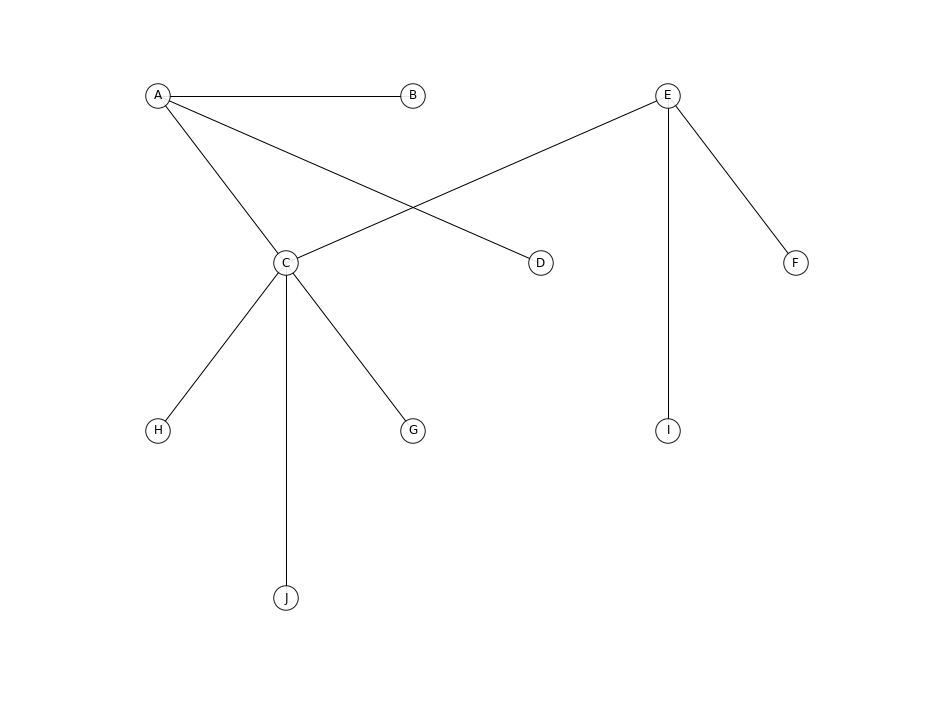

In [13]:
tree = nx.minimum_spanning_tree(T)
draw_graph(tree, pos_ex)
tree.node

In [14]:
list(nx.find_cliques(T))

[['I', 'E', 'D', 'F'],
 ['C', 'H', 'J', 'G'],
 ['C', 'B', 'D', 'A'],
 ['C', 'B', 'D', 'E'],
 ['C', 'B', 'D', 'G']]

In [15]:
nx.find_induced_nodes(T, 'A', 'I')

{'A', 'C', 'E', 'I'}

#### Junction Tree from a triangulated graph
It requires:
* An undirected graph with discrete variables as nodes
* For each clique $U$ in the graph there is a potential $\phi_{U}$

The compilation part of the method is to:
* triangulate the graph
* form a potential $\phi_{U}$ for each clique $U$ of the triangulated graph
* construct a junction tree over the cliques

####Junction Tree Property

For each pair $U$, $V$ of cliques with intersection $S$, all cliques between $U$ and $V$ contain $S$

####Propagation
* Giving all links in the junction tree a label consisting of the intersection of the adjacent nodes (Separators)
* Attaching a potential to all separators (initialized as one)
* letting the nodes communicate via the separators: A message from $U$ to $V$ with separator $S$ has the form that $\phi_{U}$ is marginalized down to $S$ resulting in $\phi_{S}^{\prime}$ ; $\phi_{S}^{\prime}$ is placed on the separator and ${\phi^{\prime}(S)}/{\phi(S)}$ is multiplied on $\phi_{V}$

###Junction Trees and Maximal Spanning Trees

The junction graph for $G$ has clique set $C$ as nodes and for each pair $U$, $V$ of cliques with nonempty intersection $R$ there is a link with label $R$. Each link has a weight which is the number of variables in the label.

A spanning tree for the junction graph G is a junction tree if and only if it is a spanning tree of maximal weight.

####Maximum Spanning Tree
A maximum spanning tree is a spanning tree of a weighted graph. It can be computed by negating the weights for each edge and applying Kruskai's Algorithm.




(('I', 'E', 'D', 'F'), ('C', 'B', 'D', 'A'), -1)
(('I', 'E', 'D', 'F'), ('C', 'B', 'D', 'E'), -2)
(('I', 'E', 'D', 'F'), ('C', 'B', 'D', 'G'), -1)
(('C', 'H', 'J', 'G'), ('C', 'B', 'D', 'A'), -1)
(('C', 'H', 'J', 'G'), ('C', 'B', 'D', 'E'), -1)
(('C', 'H', 'J', 'G'), ('C', 'B', 'D', 'G'), -2)
(('C', 'B', 'D', 'A'), ('C', 'B', 'D', 'E'), -3)
(('C', 'B', 'D', 'A'), ('C', 'B', 'D', 'G'), -3)
(('C', 'B', 'D', 'E'), ('C', 'B', 'D', 'G'), -3)


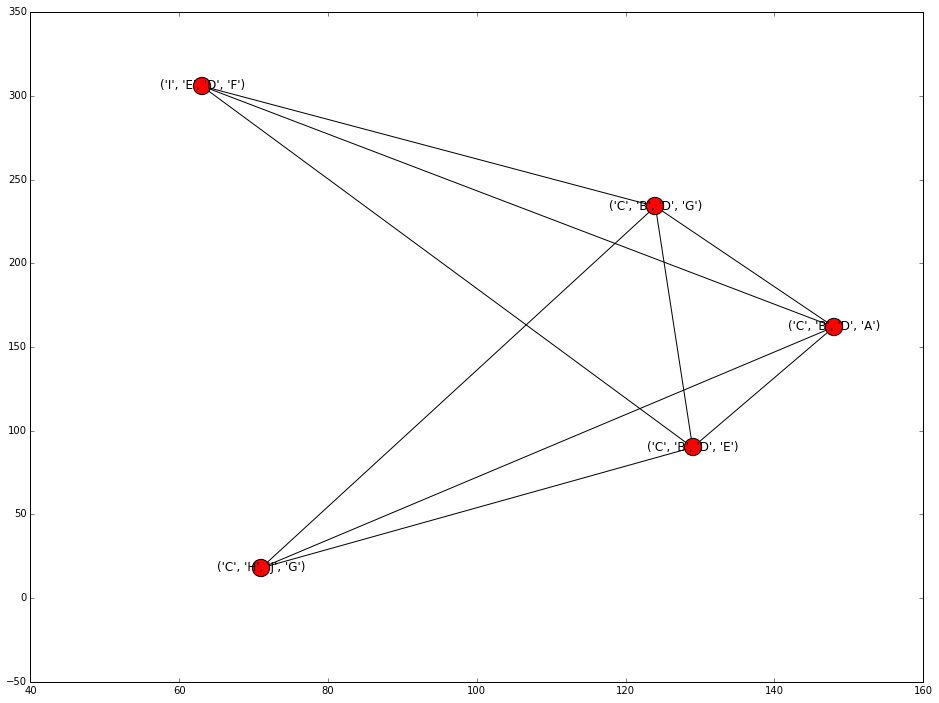

In [16]:
G = T.copy()

cliques = [tuple(c) for c in nx.find_cliques(G)]
# print cliques
edges = []
for u, v in list(combinations(cliques, 2)):
    w = len(set(u).intersection(set(v)))
    if w >0:
        #print edges
        print ((u,v,-w))
        edges.append((u, v,-w))
        #print edges

#print edges

clique_graph = nx.Graph(title='clique_graph', kind='clique')
clique_graph.add_nodes_from(cliques)
clique_graph.add_weighted_edges_from(edges)

pos = nx.graphviz_layout(clique_graph, prog='dot')
#draw_graph(clique_graph)
nx.draw_networkx(clique_graph, pos)

[(('I', 'E', 'D', 'F'), ('C', 'B', 'D', 'E'), {'weight': -2}), (('C', 'H', 'J', 'G'), ('C', 'B', 'D', 'G'), {'weight': -2}), (('C', 'B', 'D', 'A'), ('C', 'B', 'D', 'G'), {'weight': -3}), (('C', 'B', 'D', 'G'), ('C', 'B', 'D', 'E'), {'weight': -3})]

[(('C', 'B', 'D', 'G'), ('C', 'B', 'D', 'A'), {'weight': -3}), (('C', 'B', 'D', 'G'), ('C', 'B', 'D', 'E'), {'weight': -3}), (('I', 'E', 'D', 'F'), ('C', 'B', 'D', 'E'), {'weight': -2}), (('C', 'B', 'D', 'G'), ('C', 'H', 'J', 'G'), {'weight': -2})]


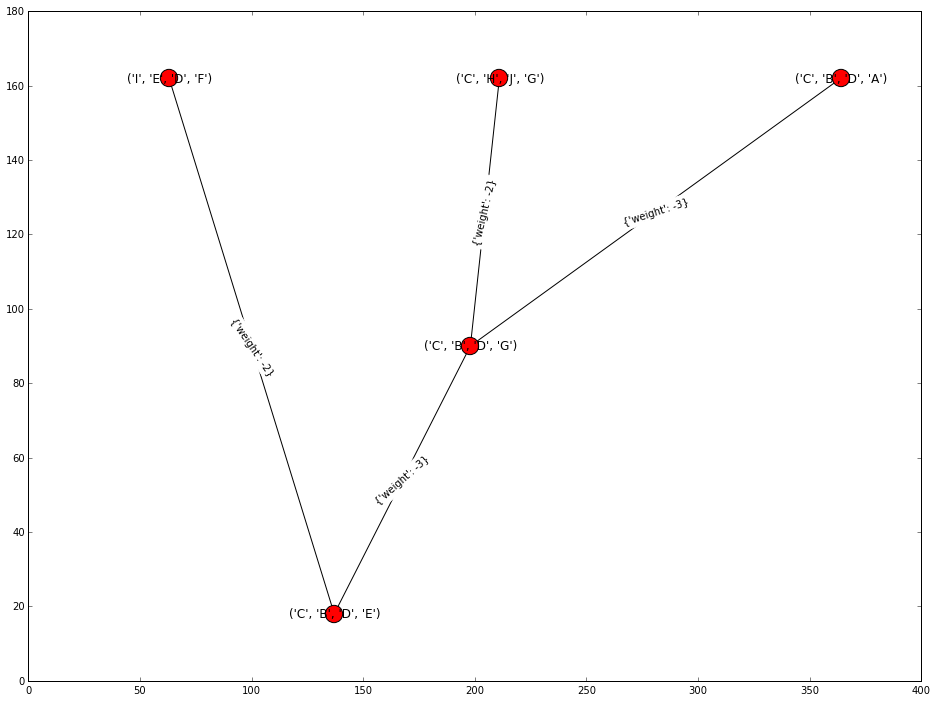

In [28]:
mst = nx.minimum_spanning_tree(clique_graph)
mse = nx.minimum_spanning_edges(clique_graph)

print mst.edges(data=True)
print
print list(mse)

# print set(list(mse))==set(mst.edges(data=True))

pos = nx.graphviz_layout(mst, prog='dot')
nx.draw_networkx_edge_labels(mst, pos)
nx.draw_networkx(mst, pos)

#####Join Tree

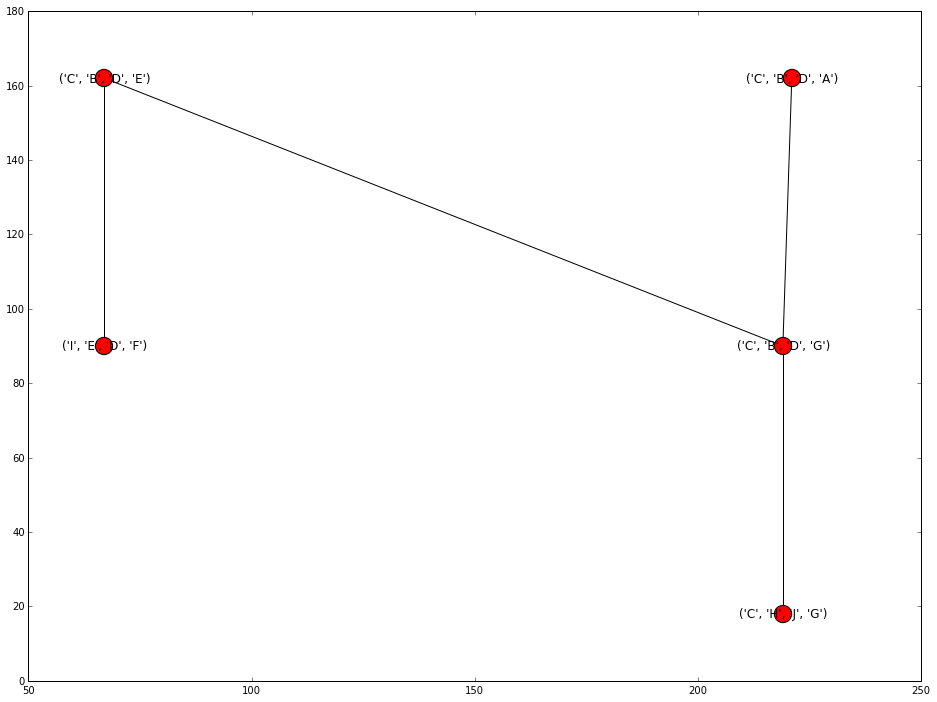

In [18]:
join_tree = nx.Graph(name = '', type='join_tree')
join_tree.add_nodes_from(mst.nodes(), type='clique')
join_tree.add_edges_from(mst.edges())
#print join_tree.edges(data=True)

pos = nx.graphviz_layout(join_tree, prog='dot')
nx.draw_networkx(join_tree, pos)

#####Junction Tree

In [19]:
junction_tree = nx.Graph(join_tree, type='junction_tree')

for u, v in junction_tree.edges():
    junction_tree.add_edge(u, v, separator=tuple(set(u).intersection(set(v))), u_in=0, u_out=0, p_in=1, p_out=1)
    #junction_tree[u][v]['mailbox'] = {'in':dict(utility=0, probability=1), 'out':dict(utility=0, probability=1)}
    #junction_tree[u][v]['in'] = dict(utility=0, probability=1)
    #junction_tree[u][v]['out']= dict(utility=0, probability=1)
    # separator = {'separator':('A','B'),'in':{'phi':1,'psi':2},'out':{'phi':3,'psi':4}}

In [20]:
print junction_tree.edges(data=True)

[(('I', 'E', 'D', 'F'), ('C', 'B', 'D', 'E'), {'p_out': 1, 'u_in': 0, 'separator': ('E', 'D'), 'p_in': 1, 'u_out': 0}), (('C', 'H', 'J', 'G'), ('C', 'B', 'D', 'G'), {'p_out': 1, 'u_in': 0, 'separator': ('C', 'G'), 'p_in': 1, 'u_out': 0}), (('C', 'B', 'D', 'A'), ('C', 'B', 'D', 'G'), {'p_out': 1, 'u_in': 0, 'separator': ('C', 'B', 'D'), 'p_in': 1, 'u_out': 0}), (('C', 'B', 'D', 'G'), ('C', 'B', 'D', 'E'), {'p_out': 1, 'u_in': 0, 'separator': ('C', 'B', 'D'), 'p_in': 1, 'u_out': 0})]


In [21]:
# edge_labels = nx.get_edge_attributes(junction_tree, 'separator')
edge_labels = []
#print edge_labels

for u, v in junction_tree.edges():
    t = (u,v)
    edge_labels.append(((u,v),'in: u=%(u_in).2f p=%(p_in).2f\nout: u=%(u_out).2f p=%(p_out).2f\n%(separator)s'
                       %junction_tree.get_edge_data(u,v)))
    
# print edge_labels
e = junction_tree.get_edge_data(('C','H','J','G'),('C','B','D','G'))
print e
# print 'in: u=%(u_in).2f p=%(p_in).2f\nout: u=%(u_out).2f p=%(p_out).2f\n%(separator)s'%e

{'p_out': 1, 'u_in': 0, 'separator': ('C', 'G'), 'p_in': 1, 'u_out': 0}


Name: 
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000


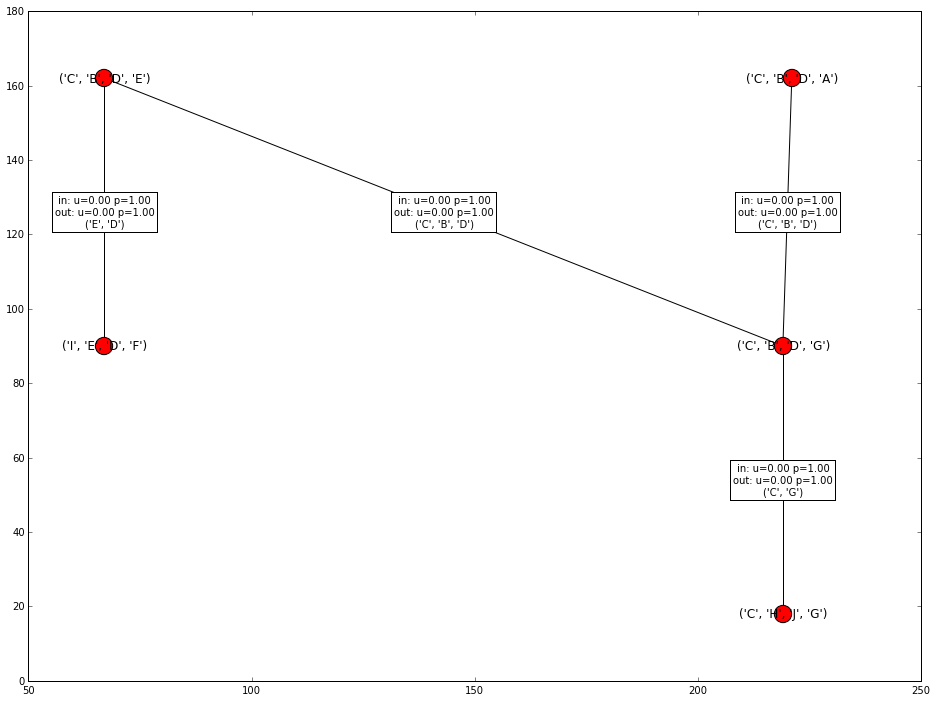

In [22]:
nx.draw_networkx(junction_tree, pos)
#nx.draw_networkx_edge(junction_tree, pos, edgelist = )
nx.draw_networkx_edge_labels(junction_tree, pos, edge_labels = dict(edge_labels), bbox=dict(boxstyle='square', fc='w',ec='k'), rotate=False)
# print join_tree.edges(data=True)
print nx.info(junction_tree)

In [23]:
def find_root(junction_tree):
    for e in junction_tree.edges():
        print e

find_root(junction_tree)

(('I', 'E', 'D', 'F'), ('C', 'B', 'D', 'E'))
(('C', 'H', 'J', 'G'), ('C', 'B', 'D', 'G'))
(('C', 'B', 'D', 'A'), ('C', 'B', 'D', 'G'))
(('C', 'B', 'D', 'G'), ('C', 'B', 'D', 'E'))


In [24]:
print cliques

[('I', 'E', 'D', 'F'), ('C', 'H', 'J', 'G'), ('C', 'B', 'D', 'A'), ('C', 'B', 'D', 'E'), ('C', 'B', 'D', 'G')]


In [46]:
print windows
windows = {0:['E','D','C','B','G','J','H','I','F','A']}

{0: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']}


In [49]:
def get_cliques(ugraph, verbose=False):
    u = ugraph.copy()
    cliques = []
    separators = []
    variables = []
    i = [0]
    #remaining = list(u.nodes())
    #remaining = ['E','D','C','B','G','J','H','I','F','A']
    #print remaining
    
    # i = 0
    for n, w in sorted(windows.items(), reverse=True):
        remaining = list(w)
        while remaining:
            proposed_clique = []
            eliminate = []
            separator = []
            simplicial = [n for n in remaining if is_simplicial(u, n)]
            if simplicial:
                selected = simplicial.pop()
                family = fa(u,selected)
                proposed_clique.extend(family)
                eliminate.append(selected)
                for f in family:
                    if f is selected:
                        remaining.remove(f)
                    elif set(nb(u, f)) <= set(family):
                        remaining.remove(f)
                        eliminate.append(f)
                    else:
                        separator.append(f)
            i.append(i[-1] + len(eliminate))
            if verbose:
                print 'Clique: ',proposed_clique
                print 'V: ', eliminate
                print 'S: ', separator
                print 'i: ', i[-1]

            u.remove_nodes_from(eliminate)
            cliques.append(proposed_clique)
            separators.append(separator)
            variables.append(eliminate)
            
    i.remove(0)
    return cliques, separators, variables, i
         
    
            
get_cliques(G, True)

Clique:  ['A', 'C', 'B', 'D']
V:  ['A']
S:  ['C', 'B', 'D']
i:  1
Clique:  ['F', 'I', 'E', 'D']
V:  ['F', 'I']
S:  ['E', 'D']
i:  3
Clique:  ['H', 'C', 'J', 'G']
V:  ['H', 'J']
S:  ['C', 'G']
i:  5
Clique:  ['G', 'C', 'B', 'D']
V:  ['G']
S:  ['C', 'B', 'D']
i:  6
Clique:  ['B', 'C', 'E', 'D']
V:  ['B', 'C', 'E', 'D']
S:  []
i:  10


([['A', 'C', 'B', 'D'],
  ['F', 'I', 'E', 'D'],
  ['H', 'C', 'J', 'G'],
  ['G', 'C', 'B', 'D'],
  ['B', 'C', 'E', 'D']],
 [['C', 'B', 'D'], ['E', 'D'], ['C', 'G'], ['C', 'B', 'D'], []],
 [['A'], ['F', 'I'], ['H', 'J'], ['G'], ['B', 'C', 'E', 'D']],
 [1, 3, 5, 6, 10])